<a href="https://colab.research.google.com/github/vuaanhua/bui-le-anh-vu-20104073/blob/main/project_cu%E1%BB%91i_k%C3%AC_ph%C3%A2n_bi%E1%BB%87t_nh%E1%BA%A1c_c%E1%BB%A5_truy%E1%BB%81n_th%E1%BB%91ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/NCTTVN/nhaccu

/content/drive/MyDrive/Colab Notebooks/NCTTVN/nhaccu


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/NCTTVN/nhaccu/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 208 images belonging to 7 classes.


In [ ]:
input =train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/NCTTVN/nhaccu/input',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 101 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'sáo trúc': 0,
 'đàn bầu': 1,
 'đàn nguyệt': 2,
 'đàn nhị': 3,
 'đàn tranh': 4,
 'đàn tùy bà': 5,
 'đàn đáy': 6}

In [ ]:
input.class_indices

{'sáo trúc': 0,
 'đàn bầu': 1,
 'đàn nguyệt': 2,
 'đàn nhị': 3,
 'đàn tranh': 4,
 'đàn tùy bà': 5,
 'đàn đáy': 6}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(7, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(training_set, epochs = 50, batch_size=128, verbose = 1, validation_data = input, callbacks = [EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
7/7 [==============================] - 33s 5s/step - loss: 2.3333 - accuracy: 0.2981 - val_loss: 1.9982 - val_accuracy: 0.2574
Epoch 2/50
7/7 [==============================] - 5s 796ms/step - loss: 1.7573 - accuracy: 0.3990 - val_loss: 1.8852 - val_accuracy: 0.2574
Epoch 3/50
7/7 [==============================] - 5s 776ms/step - loss: 1.7587 - accuracy: 0.4087 - val_loss: 1.7898 - val_accuracy: 0.2574
Epoch 4/50
7/7 [==============================] - 5s 767ms/step - loss: 1.6972 - accuracy: 0.4087 - val_loss: 1.7302 - val_accuracy: 0.2574
Epoch 5/50
7/7 [==============================] - 5s 792ms/step - loss: 1.7171 - accuracy: 0.4135 - val_loss: 1.7626 - val_accuracy: 0.2574
Epoch 6/50
7/7 [==============================] - 5s 732ms/step - loss: 1.7031 - accuracy: 0.4087 - val_loss: 1.7100 - val_accuracy: 0.2574
Epoch 7/50
7/7 [==============================] - 5s 767ms/step - loss: 1.6674 - accuracy: 0.4183 - val_loss: 1.6208 - val_accuracy: 0.3168
Epoch 8/50
7/7 [======

In [ ]:
Score = model.evaluate(training_set, verbose = 0)
print('train loss', Score[0])
print('train accuracy', Score[1])

train loss 0.02936410903930664
train accuracy 0.9903846383094788


In [ ]:
model.save("nhaccutruyenthong.h5")

In [ ]:
model_CNN = load_model('nhaccutruyenthong.h5')

1/1 [==============================] - 0s 16ms/step
đàn tranh


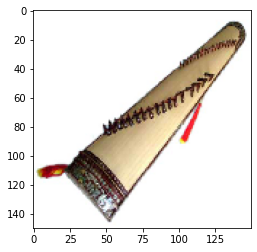

1/1 [==============================] - 0s 18ms/step
đàn bầu


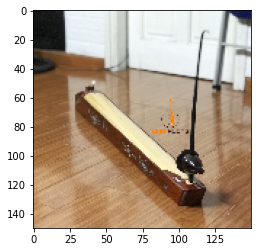

1/1 [==============================] - 0s 19ms/step
đàn đáy


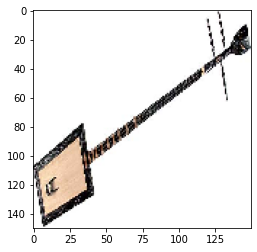

1/1 [==============================] - 0s 16ms/step
đàn nguyệt


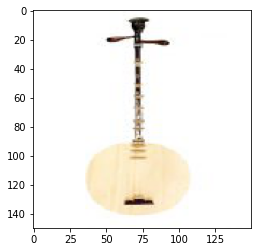

1/1 [==============================] - 0s 15ms/step
đàn tùy bà


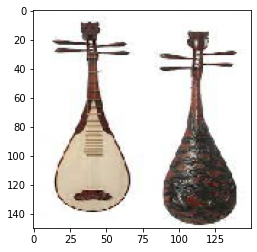

1/1 [==============================] - 0s 16ms/step
đàn nhị


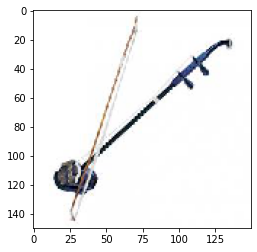

1/1 [==============================] - 0s 16ms/step
đàn nhị


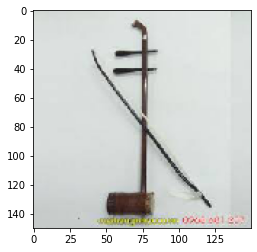

1/1 [==============================] - 0s 17ms/step
sáo trúc


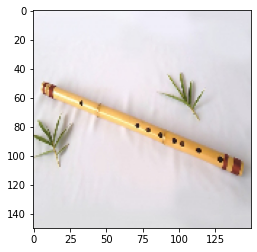

1/1 [==============================] - 0s 15ms/step
sáo trúc


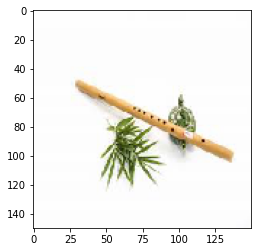

In [ ]:
test= "/content/drive/MyDrive/Colab Notebooks/NCTTVN/nhaccu/test/"

for i in os.listdir(test):
  img = load_img(test+'/'+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img= img/255
  img = np.expand_dims(img, axis = 0)
  result = model_CNN.predict(img)
  if round(result[0][0]) == 1:
    prediction = 'sáo trúc'
  if round(result[0][1]) == 1:
    prediction = 'đàn bầu'
  if round(result[0][2]) == 1:
    prediction = 'đàn nguyệt'
  if round(result[0][3]) == 1:
    prediction = 'đàn nhị'  
  if round(result[0][4]) == 1:
    prediction = 'đàn tranh'
  if round(result[0][5]) == 1:
    prediction = 'đàn tùy bà'
  if round(result[0][6]) == 1:
    prediction =  'đàn đáy'
 
  print(prediction)
  plt.show()

In [ ]:
# code làm giao diện
import tkinter as tk
from PIL import ImageTk, Image
from tkinter import filedialog
import numpy as np
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array

new_model = tf.keras.models.load_model("C:\\Users\\DELL\\Downloads\\nhaccutruyenthong.h5")

#Def button import image
def load_img():
    global img, image_data
    for img_display in frame.winfo_children():
        img_display.destroy()
    

    image_data = filedialog.askopenfilename(initialdir="/", title="Choose an image",
                                       filetypes=(("all files", "*.*"), ("png files", "*.png")))
    basewidth = 150 # Processing image for displaying
    img = Image.open(image_data)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    #file_name = image_data.split('/')
    #panel = tk.Label(frame, text= str(file_name[len(file_name)-1]).upper()).pack()
    panel_image = tk.Label(frame, image=img).pack()


#Def button Output

def classify():
    avu = Image.open(image_data)
    avu = avu.resize((150, 150), Image.ANTIALIAS)
    numpy_image = img_to_array(avu)
    image_batch = np.expand_dims(numpy_image, axis=0)
    #processed_image = new_model.preprocess_input(image_batch.copy())
    result = new_model.predict(image_batch)
    global prediction
    if round(result[0][0]) == 1:
        prediction = 'sáo trúc'
    if round(result[0][1]) == 1:
        prediction = 'đàn bầu'
    if round(result[0][2]) == 1:
        prediction = 'đàn nguyệt'
    if round(result[0][3]) == 1:
        prediction = 'đàn nhị'
    if round(result[0][4]) == 1:
        prediction = 'đàn tranh' 
    if round(result[0][5]) == 1:
        prediction = 'đàn tùy bà'
    if round(result[0][6]) == 1:
        prediction = 'đàn đáy'
   
    print("Đây là :", str(prediction).upper())
    
    #List nhạc cụ truyền thống
    d = {"sáo trúc":"Là một trong những loại nhạc cụ truyền thống Việt Nam ",
    'đàn bầu':"thanh âm phát ra nhờ sử dụng que hay miếng gảy vào dây",
    "đàn nguyệt ":" Loại đàn này có hộp đàn hình tròn như mặt trăng",
    "đàn nhị":"nhạc cụ thuộc bộ dây có cung vĩ, do đàn có 2 dây nên gọi là đàn nhị",
    "đàn tranh":"nhạc khí dùng để độc tấu, hòa tấu, đệm cho hát và được chơi trong nhiều thể loại âm nhạc như các dàn nhạc dân ca",
    'đàn tùy bà':" là một nhạc cụ dây gảy của người phương Đông được phổ biến nhất ở Trung Quốc",
    'đàn đáy':"là một loại nhạc cụ có 3 dây, phần cán rất dài và mặt sau của thùng âm có một lỗ lớn"}
    

    
    


    #Viet len window
    table = tk.Label(frame, text=str("Kết quả thu được").upper()).pack()
    top = tk.Label(frame, text = str(prediction).upper(), bg = 'orange', font= ("", 28)).pack()
    top1 = tk.Message(frame, width= 400, justify= 'left', text= str(d[prediction])).pack()
    top2  = tk.Label(frame, text= 'Nhac cụ truyền thống  '+str(prediction)+' trên  đây ', bg = 'yellow', font=("", 15))
    top2.pack()
    
    
    
    
    
    
# Def giao dien
wd = tk.Tk()
wd.title('NHẬN DIỆN NHẠC CỤ TRUYỀN THỐNG VIỆT NAM')
wd.resizable(True, True)
tit = tk.Label(wd, text="what is music ?", padx=25, pady=6, font=("", 20)).pack()

canvas = tk.Canvas(wd, height=500, width=500, bg='yellow')
canvas.pack()
frame = tk.Frame(wd,width= 600, height= 500, bg='orange')
frame.place(relwidth=0.8, relheight=0.8, relx=0.1, rely=0.1)
chose_image = tk.Button(wd, text='chọn hình ảnh',
                        padx=35, pady=10,
                        fg="white", bg="lightcoral", command=load_img)
chose_image.pack(side=tk.LEFT)
class_image = tk.Button(wd, text='phân loại hình ảnh',
                        padx=35, pady=10,
                        fg="white", bg="dodger blue", command=classify)
class_image.pack(side=tk.RIGHT)



wd.mainloop()